In [1]:
from data.data_handler import load_data_wrapper, get_first_10_digits, show_as_image

training_data, validation_data, test_data = load_data_wrapper(noise=True)

ten_digits = get_first_10_digits(validation_data, i=600)

In [2]:
from network.Convolver import Convolver3x3
import numpy as np

convolver = Convolver3x3()
convolver.kernel = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
])

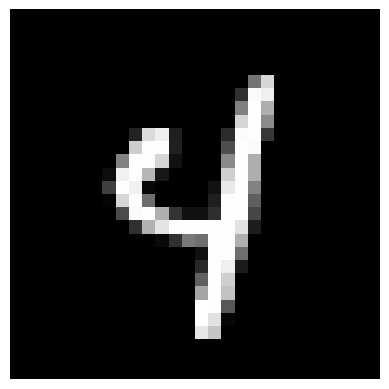

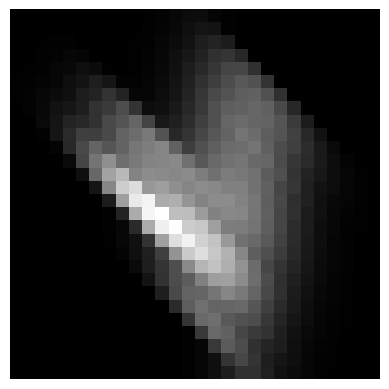

In [6]:
inp, out = ten_digits[4]

convolved_img = convolver.convolve(inp)

for _ in range(10):
    convolved_img = convolver.convolve(convolved_img)

show_as_image(inp.reshape(28,28))
show_as_image(convolved_img.reshape(28,28))

# The Sobel filter
This kernel gives us the ability to find edges in one direction. We will need two of them in order to get both horizontal and vertical edges.

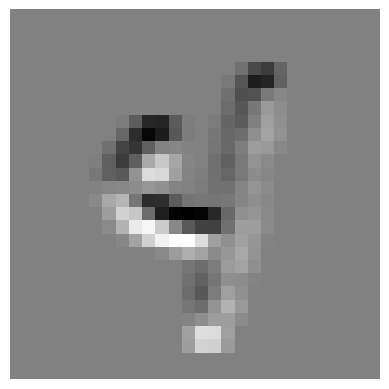

In [7]:
convolver.kernel = np.array([
    [ 1,   2,   1],
    [ 0,   0,   0],
    [-1,  -2,  -1],
])

sobel_v = convolver.convolve(inp)

show_as_image(sobel_v.reshape(28,28))

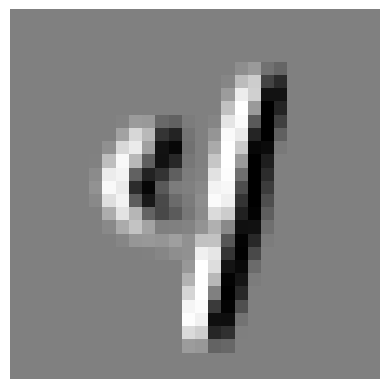

In [9]:
convolver.kernel = np.array([
    [-1,   0,   1],
    [-2,   0,   2],
    [-1,   0,   1],
])

sobel_h = convolver.convolve(inp)

show_as_image(sobel_h.reshape(28,28))

We can now combine both images into one.

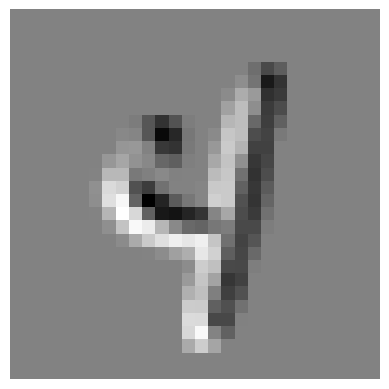

In [10]:
sobel_final = (sobel_h + sobel_v) / 2
show_as_image(sobel_final.reshape(28,28))

In [11]:
sobel_final[500:600]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.03515625,
        0.22265625,  0.6640625 ,  0.97265625,  2.2578125 ,  1.76171875,
       -0.80859375, -1.34765625, -0.5390625 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.22265625,  1.671875  ,  1.390625  , -1.26171875, -1.30859375,
       -0.10546875,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [14]:
sobel_final_normalized = (sobel_final - np.min(sobel_final)) / (- np.min(sobel_final) + np.max(sobel_final))
sobel_final_normalized

array([0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089918,
       0.51089918, 0.51089918, 0.51089918, 0.51089918, 0.51089

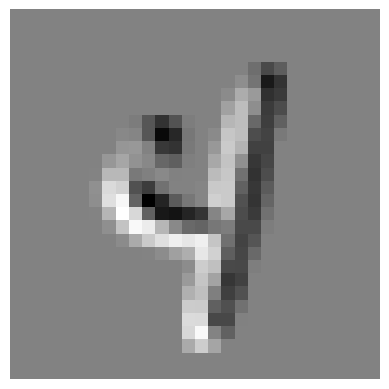

In [15]:
show_as_image(sobel_final_normalized.reshape(28,28))

# The Laplacian


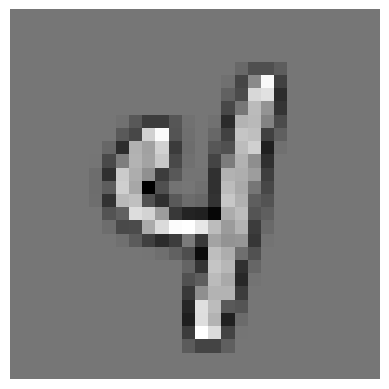

In [12]:
convolver.kernel = np.array([
    [-1,  -1,   -1],
    [-1,   8,   -1],
    [-1,  -1,   -1],
])

laplace = convolver.convolve(inp)
show_as_image(laplace.reshape(28,28))